# Classification. Linear models and KNN

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Implementing Logistic Regression

In this task you need to implement Logistic Regression with l2 regularization using gradient descent algorithm.

Logistic Regression loss:
$$ L(w) = \dfrac{1}{N}\sum_{i=1}^N \log(1 + e^{-\langle w, x_i \rangle y_i}) + \frac{1}{2C} \lVert w \rVert^2  \to \min_w$$
$$\langle w, x_i \rangle = \sum_{j=1}^n w_{j}x_{ij} + w_{0},$$ $$ y_{i} \in \{-1, 1\}$$ where $n$ is the number of features and $N$ is the number of samples.

Gradient descent step:
$$w^{(t+1)} := w^{(t)} + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w^{(t)}, x_i \rangle y_i)}\Big) - \eta \frac{1}{C} w,$$
where $\eta$ is the learning rate.

**(2 points)** Implement the algorithm and use it to classify the digits (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) into "even" and "odd" categories. "Even" and "Odd" classes  should correspond to {-1, 1} labels.

Stopping criteria: either the number of iterations exceeds *max_iter* or $||w^{(t+1)} - w^{(t)}||_2 < tol$.

In [3]:
from sklearn.exceptions import NotFittedError

In [4]:
from math import *

In [5]:
exp(-3)

0.049787068367863944

In [294]:
class CustomLogisticRegression:
    _estimator_type = "classifier"
    
    def __init__(self, eta=0.001, max_iter=1000, C=1.0, tol=1e-5, random_state=42, zero_init=False):
        """Logistic Regression classifier.
        
        Args:
            eta: float, default=0.001
                Learning rate.
            max_iter: int, default=1000
                Maximum number of iterations taken for the solvers to converge.
            C: float, default=1.0
                Inverse of regularization strength; must be a positive float.
                Smaller values specify stronger regularization.
            tol: float, default=1e-5
                Tolerance for stopping criteria.
            random_state: int, default=42
                Random state.
            zero_init: bool, default=False
                Zero weight initialization.
        """
        self.eta = eta
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.random_state = np.random.RandomState(seed=random_state)
        self.zero_init = zero_init
         
    def get_sigmoid(self, X, weights):
        """Compute the sigmoid value."""
        return 1 / (1 + exp(-X))
        pass
    
    def get_loss(self, x, weights, y):
        """Calculate the loss."""
        # <your code>
        pass
     
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X]) # a constant feature is included to handle intercept
        num_features = X_ext.shape[1]
        if self.zero_init:
            self.weights_ = np.zeros(num_features) 
        else:
            weight_threshold = 1.0 / (2 * num_features)
            self.weights_ = self.random_state.uniform(low=-weight_threshold,
                                                      high=weight_threshold, size=num_features) # random weight initialization
        
        for i in range(self.max_iter):
            delta = delta = - X_ext.T @ (y * (1 - 1 / (1 + np.exp(-(self.weights @ X_ext.T) * y)))) / len(y) + (self.weights / self.C)
            self.weights_ -= self.eta * delta
            if (i > self.max_iter) or np.linalg.norm(delta) < tol:
                break
     
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing positive class probabilities.
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        if hasattr(self, 'weights_'):
            return self.get_sigmoid(X_ext, self.weights_)
        else: 
            raise NotFittedError("CustomLogisticRegression instance is not fitted yet")
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [295]:
from sklearn import datasets
from sklearn import metrics

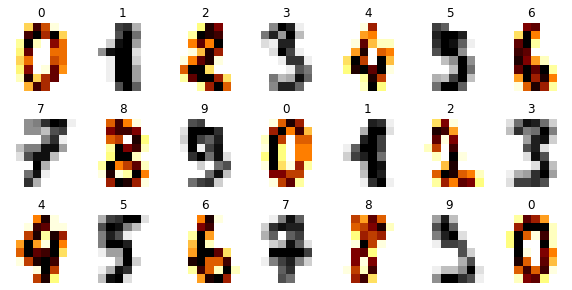

In [296]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test = (y_test % 2) * 2 - 1

In [297]:
assert (np.unique(y_train) == [-1, 1]).all()
assert (np.unique(y_test) == [-1, 1]).all()

In [298]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metrics.accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

In [299]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)

In [300]:
assert np.allclose(lr_clf.get_sigmoid(np.array([[0.5, 0, 1.0], [0.3, 1.3, 1.0]]), np.array([0.5, -0.5, 0.1])),
                   np.array([0.58662, 0.40131]))

TypeError: only size-1 arrays can be converted to Python scalars

In [301]:
lr_clf.fit(X_train, y_train)

AttributeError: 'CustomLogisticRegression' object has no attribute 'weights'

In [302]:
assert np.allclose(lr_clf.weights_, np.array([ 3.1000e-06,  0.0000e+00,  4.1800e-05,  5.4770e-04,  2.2130e-04,
        4.8750e-04,  1.3577e-03,  5.9780e-04,  5.6400e-05, -7.0000e-07,
        1.6910e-04,  2.5190e-04, -4.3700e-04,  3.6190e-04,  1.0049e-03,
        4.2280e-04,  2.5700e-05,  3.0000e-07, -1.1500e-05, -7.2440e-04,
       -2.6200e-04,  8.7540e-04,  4.1540e-04, -8.4200e-05, -5.2000e-06,
        0.0000e+00, -2.2160e-04, -5.7130e-04,  9.8570e-04,  1.3507e-03,
        5.0210e-04, -1.7050e-04, -1.0000e-06,  0.0000e+00, -6.7810e-04,
       -1.0515e-03, -4.4500e-05,  3.7160e-04,  4.2100e-04, -8.1800e-05,
        0.0000e+00, -5.2000e-06, -5.3410e-04, -2.0393e-03, -8.4310e-04,
        1.0400e-04, -1.2390e-04, -1.7880e-04, -1.3200e-05, -4.5000e-06,
       -9.4300e-05, -1.1127e-03, -5.0900e-04, -2.1850e-04, -5.6050e-04,
       -3.9560e-04, -1.7700e-05, -3.0000e-07,  2.6800e-05,  6.3920e-04,
        1.8090e-04, -7.3660e-04, -5.3930e-04, -3.7060e-04, -2.8200e-05]), atol=1e-5)

AssertionError: 

In [ ]:
model = CustomLogisticRegression()

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
train_acc, test_acc

In [ ]:
assert min(train_acc, test_acc) > 0.9

**(0.5 points)** Visualize the loss history.

In [ ]:
## your code

**(0.5 points)** Try different learning rates and compare the results. How does the learning rate influence the convergence?

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Try different regularization parameter values and compare the model quality.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare zero initialization and random initialization. 

In [ ]:
## your code

< your thoughts >

## Part 2: Implementing KNN Classifier

In this task you need to implement weighted K-Neighbors Classifier.

Recall that training a KNN classifier is simply memorizing a training sample. 

The process of applying a classifier for one object is to find the distances from it to all objects in the training data, then select the k nearest objects (neighbors) and return the most common class among these objects.

You can also give the nearest neighbors weights in accordance with the distance of the object to them. In the simplest case (as in your assignment), you can set the weights inversely proportional to that distance. 

$$w_{i} = \frac{1}{d_{i} + eps},$$

where $d_{i}$ is the distance between object and i-th nearest neighbor and $eps$ is the small value to prevent division by zero.

In case of 'uniform' weights, all k nearest neighbors are equivalent (have equal weight, for example $w_{i} = 1, \forall i \in(1,k)$).

To predict the probability of classes, it is necessary to normalize the weights of each class, dividing them by the sum:

$$p_{i} = \frac{w_{i}}{\sum_{j=1}^{c}w_{j}},$$

where $p_i$ is probability of i-th class and $c$ is the number of classes.

**(2 points)** Implement the algorithm and use it to classify the digits. By implementing this algorithm, you will be able to classify numbers not only into "even" or "odd", but into their real representation.

In [ ]:
class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0 
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        # <your code>
        pass
    
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samles,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        # <your code>
        pass
            
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)
            
            weights_of_points = np.ones(P.shape)
            if self.weights == 'distance':
                weights_of_points = 'your code'
                
            # <your code>
            pass
        
        else: 
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [ ]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
assert np.allclose(model.get_pairwise_distances(np.array([[0  , 1]  , [1, 1]]), 
                                                np.array([[0.5, 0.5], [1, 0]])),
                   np.array([[0.70710678, 1.41421356],
                             [0.70710678, 1.        ]]))

In [ ]:
model.classes_ = ['one', 'two', 'three']
assert np.allclose(model.get_class_weights(np.array(['one', 'one', 'three', 'two']), np.array([1, 1, 0, 4])), 
                   np.array([2,4,0]))

In [ ]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
model.fit(X_train, y_train)
knn.fit(X_train, list(map(str, y_train)));

In [ ]:
assert np.allclose(model.predict_proba(X_test), knn.predict_proba(X_test))

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
assert train_acc == 1
assert test_acc > 0.98

**(0.5 points)** Take a look at the confusion matrix and tell what numbers the model confuses and why this happens.

< your thoughts >

**(0.5 points)** Try different n_neighbors parameters and compare the output probabilities of the model.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Compare both 'uniform' and 'distance' weights and share your thoughts in what situations which parameter can be better.

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Suggest another distance measurement function that could improve the quality of the classification for this task. 

< your thoughts >

**(0.5 points)** Suggest different task and distance function that you think would be suitable for it.

< your thoughts >

## Part 3: Synthetic Titanic Survival Prediction

### Dataset

Read the description here: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation.  


In [190]:
PATH = "E:\RS SCHOOL ML\\5Classification"

In [191]:
titanic_data = pd.read_csv(os.path.join(PATH, 'train.csv'))

In [192]:
test = pd.read_csv(os.path.join(PATH, 'test.csv'))

In [193]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [194]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [195]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [196]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [197]:
titanic_num = titanic_data[['Age','SibSp','Parch','Fare']]
titanic_cat = titanic_data[['Survived','Pclass', 'Sex', 'Ticket', 'Cabin','Embarked']]

In [198]:
print(titanic_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.112459 -0.125535  0.109164
SibSp -0.112459  1.000000  0.213126  0.059358
Parch -0.125535  0.213126  1.000000  0.061443
Fare   0.109164  0.059358  0.061443  1.000000


<AxesSubplot:>

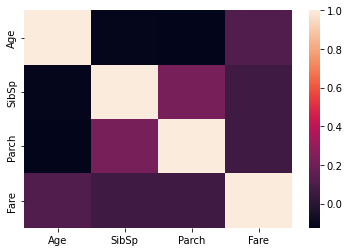

In [199]:
sns.heatmap(titanic_num.corr())

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

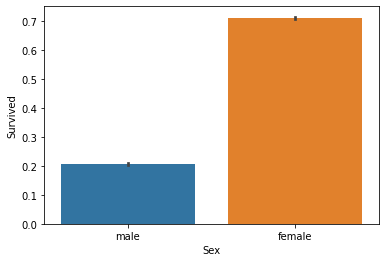

In [200]:
sns.barplot(x = titanic_data['Sex'], y = 'Survived', data = titanic_data)

In [201]:
pd.DataFrame({
    'count': titanic_data['Sex'].value_counts(),
    'frequency(%)': (titanic_data['Sex'].value_counts() / data.shape[0]) * 100
})

,count,frequency(%)
male,56114,56.114
female,43886,43.886


In [202]:
titanic_data['Sex'].value_counts()[0] - titanic_data['Sex'].value_counts()[1]

12228

There were more men on the board than women (by 12 thousand). But the survival rate of men is only 20%, the survival rate of women is about 70%.

< your thoughts >

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

In [203]:
titanic_data['Age'].describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

Text(-9.075000000000003, 0.5, 'Count')

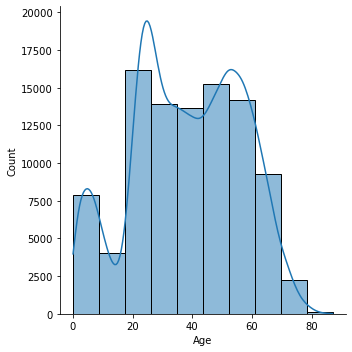

In [204]:
sns.displot(data=data, x='Age', kde=True, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')

In [205]:
data[(data['Survived'] == 0)]['Age'].median()

36.0

In [206]:
data[(data['Survived'] == 1)]['Age'].median()

43.0

In [207]:
data[(data['Survived'] == 0)]['Age'].mean()

36.708694881533724

In [208]:
data[(data['Survived'] == 1)]['Age'].mean()

40.55379931430776

Text(-9.075000000000003, 0.5, 'Count')

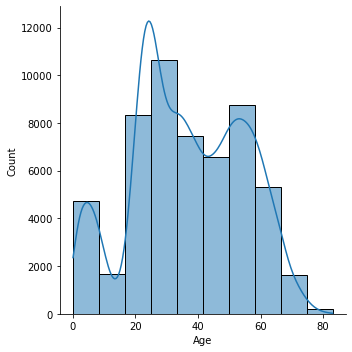

In [209]:
sns.displot(data=data[(data['Survived'] == 0)], x='Age', kde=True, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')

Text(-2.700000000000003, 0.5, 'Count')

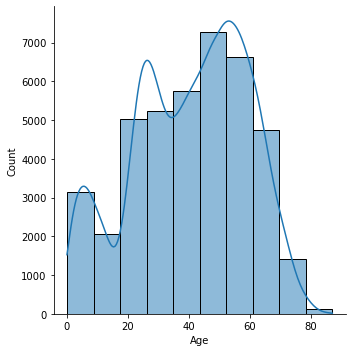

In [210]:
sns.displot(data=data[(data['Survived'] == 1)], x='Age', kde=True, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')

They saved the elderly and people under 20 years old more efficient.

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

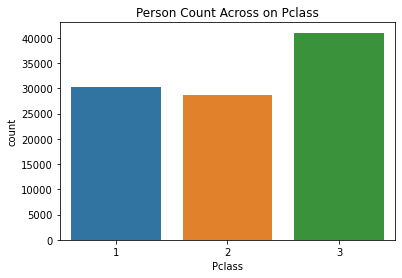

In [211]:

sns.countplot(x='Pclass',data=titanic_data)
plt.title('Person Count Across on Pclass')
 
plt.show()

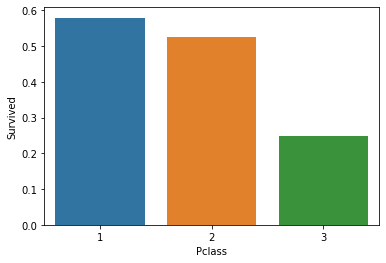

In [212]:
sns.barplot (data = titanic_data, x = "Pclass", y = "Survived", ci = None) 
 
plt.show()

First class was the safest. Most of the passengers are in third-class cabins.

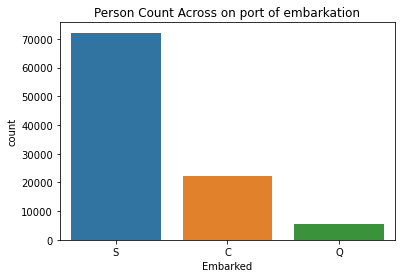

In [213]:
sns.countplot(x='Embarked',data=titanic_data)
plt.title('Person Count Across on port of embarkation')
 
plt.show()

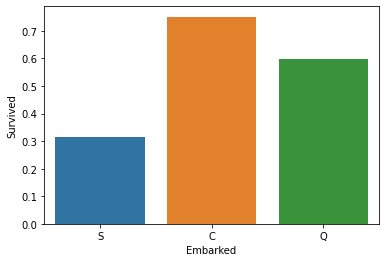

In [214]:
sns.barplot (data = titanic_data, x = "Embarked", y = "Survived", ci = None) 
 
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

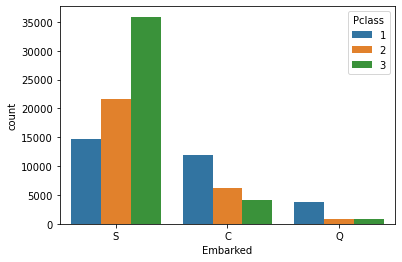

In [215]:

sns.countplot(data=data, x='Embarked', hue='Pclass')

The lowest survival rate is among those who got on the ship from port "C". By the way, the prevailing number of Class 3 passengers got on board here.

### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [216]:
pd.DataFrame({
    'Missing': data.isna().sum(),
    'Missing(%)': (data.isna().sum() / data.shape[0]) * 100
}).sort_values(by='Missing', ascending=False)

,Missing,Missing(%)
Cabin,67866,67.866
Ticket,4623,4.623
Age,3292,3.292
Embarked,250,0.250
Fare,134,0.134
Survived,0,0.000
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
SibSp,0,0.000


In [217]:
titanic_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

< your thoughts >

The data can be filled with the average value of the column. 
2)df.dropna()

In [218]:
mean = data[(data['Survived'] == 0)]['Age'].mean()
titanic_data['Age'].fillna(mean)

0        36.708695
1        36.708695
2         0.330000
3        19.000000
4        25.000000
           ...    
99995    62.000000
99996    66.000000
99997    37.000000
99998    51.000000
99999    55.000000
Name: Age, Length: 100000, dtype: float64

In [219]:
titanic_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [221]:
train_test_data = [titanic_data, test]
train_test_data

[       PassengerId  Survived  Pclass                Name     Sex    Age  \
 0                0         1       1    Oconnor, Frankie    male    NaN   
 1                1         0       3         Bryan, Drew    male    NaN   
 2                2         0       3      Owens, Kenneth    male   0.33   
 3                3         0       3       Kramer, James    male  19.00   
 4                4         1       3       Bond, Michael    male  25.00   
 ...            ...       ...     ...                 ...     ...    ...   
 99995        99995         1       2         Bell, Adele  female  62.00   
 99996        99996         0       2       Brown, Herman    male  66.00   
 99997        99997         0       3  Childress, Charles    male  37.00   
 99998        99998         0       3    Caughlin, Thomas    male  51.00   
 99999        99999         0       3       Enciso, Tyler    male  55.00   
 
        SibSp  Parch     Ticket   Fare   Cabin Embarked  
 0          2      0     209

In [222]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [223]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [224]:
for dataset in train_test_data:
    
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [225]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
titanic_data['AgeBand'] = pd.cut(titanic_data['Age'], 5)

print (titanic_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

          AgeBand  Survived
0  (-0.087, 17.4]  0.437358
1    (17.4, 34.8]  0.344755
2    (34.8, 52.2]  0.449343
3    (52.2, 69.6]  0.484228
4    (69.6, 87.0]  0.632806


C:\Users\Admin\AppData\Local\Temp/ipykernel_6736/2640045776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list


In [226]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [227]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(titanic_data['Fare'].median())

In [228]:
titanic_data['FareBand'] = pd.qcut(titanic_data['Fare'], 4)
print (titanic_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (0.679, 10.04]  0.246155
1   (10.04, 24.46]  0.374201
2   (24.46, 33.47]  0.510109
3  (33.47, 744.66]  0.581063


In [229]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [230]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (titanic_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

    FamilySize  Survived
0            1  0.404394
1            2  0.516254
2            3  0.482436
3            4  0.409194
4            5  0.335294
5            6  0.440345
6            7  0.325301
7            8  0.269231
8            9  0.252252
9           10  0.452229
10          11  0.414062
11          12  0.450000
12          13  0.285714
13          14  0.200000
14          15  0.000000
15          18  0.500000


In [231]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (titanic_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.465594
1        1  0.404394


In [232]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,FareBand,FamilySize,IsAlone
0,0,1,1,"Oconnor, Frankie",0,1,2,0,209245,2,C12239,0,"(17.4, 34.8]","(24.46, 33.47]",3,0
1,1,0,3,"Bryan, Drew",0,3,0,0,27323,1,NaN,0,"(34.8, 52.2]","(10.04, 24.46]",1,1
2,2,0,3,"Owens, Kenneth",0,0,1,2,CA 457703,3,NaN,0,"(-0.087, 17.4]","(33.47, 744.66]",4,0
3,3,0,3,"Kramer, James",0,1,0,0,A. 10866,1,NaN,0,"(17.4, 34.8]","(10.04, 24.46]",1,1
4,4,1,3,"Bond, Michael",0,1,0,0,427635,0,NaN,0,"(17.4, 34.8]","(0.679, 10.04]",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",1,3,0,0,PC 15008,2,D17243,1,"(52.2, 69.6]","(10.04, 24.46]",1,1
99996,99996,0,2,"Brown, Herman",0,4,0,0,13273,1,NaN,0,"(52.2, 69.6]","(10.04, 24.46]",1,1
99997,99997,0,3,"Childress, Charles",0,2,0,0,NaN,1,NaN,0,"(34.8, 52.2]","(0.679, 10.04]",1,1
99998,99998,0,3,"Caughlin, Thomas",0,3,0,1,458654,2,NaN,0,"(34.8, 52.2]","(24.46, 33.47]",2,0


In [233]:



titanic_data = titanic_data.drop(['AgeBand', 'FareBand'], axis=1)

<AxesSubplot:>

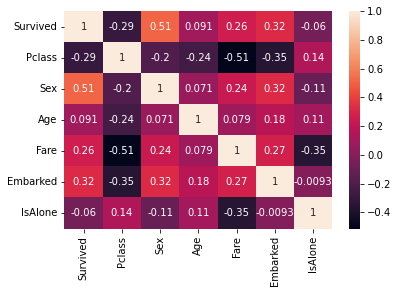

In [257]:
sns.heatmap(titanic_data.corr(), annot=True)

In [241]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,1,1,0,1,2,0,0
1,1,0,3,0,3,1,0,1
2,2,0,3,0,0,3,0,0
3,3,0,3,0,1,1,0,1
4,4,1,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...
99995,99995,1,2,1,3,2,1,1
99996,99996,0,2,0,4,1,0,1
99997,99997,0,3,0,2,1,0,1
99998,99998,0,3,0,3,2,0,0


In [236]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
titanic_data = titanic_data.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
titanic_data = titanic_data.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

KeyError: "['AgeBand' 'FareBand'] not found in axis"

In [251]:
titanic_data = titanic_data.drop(['PassengerId'], axis=1)

In [255]:
X_train = titanic_data.drop('Survived', axis=1)
y_train = titanic_data['Survived']
X_test = test.drop("PassengerId", axis=1).copy()


X_train.shape, y_train.shape, X_test.shape

((100000, 6), (100000,), (100000, 6))

In [258]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,100000,3,0,1,3,0,1
1,100001,3,1,3,0,0,1
2,100002,1,1,1,3,1,1
3,100003,2,0,1,1,0,1
4,100004,1,1,1,2,1,0
...,...,...,...,...,...,...,...
99995,199995,3,1,1,1,2,1
99996,199996,1,0,3,3,0,0
99997,199997,3,0,2,1,0,1
99998,199998,1,1,3,2,1,0


In [259]:
titanic_data

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,1,1,0,1,2,0,0
1,0,3,0,3,1,0,1
2,0,3,0,0,3,0,0
3,0,3,0,1,1,0,1
4,1,3,0,1,0,0,1
...,...,...,...,...,...,...,...
99995,1,2,1,3,2,1,1
99996,0,2,0,4,1,0,1
99997,0,3,0,2,1,0,1
99998,0,3,0,3,2,0,0


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [256]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

75.77 percent


In [260]:
output = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':y_pred_log_reg})
output.to_csv('my_submission.csv', index=False)  

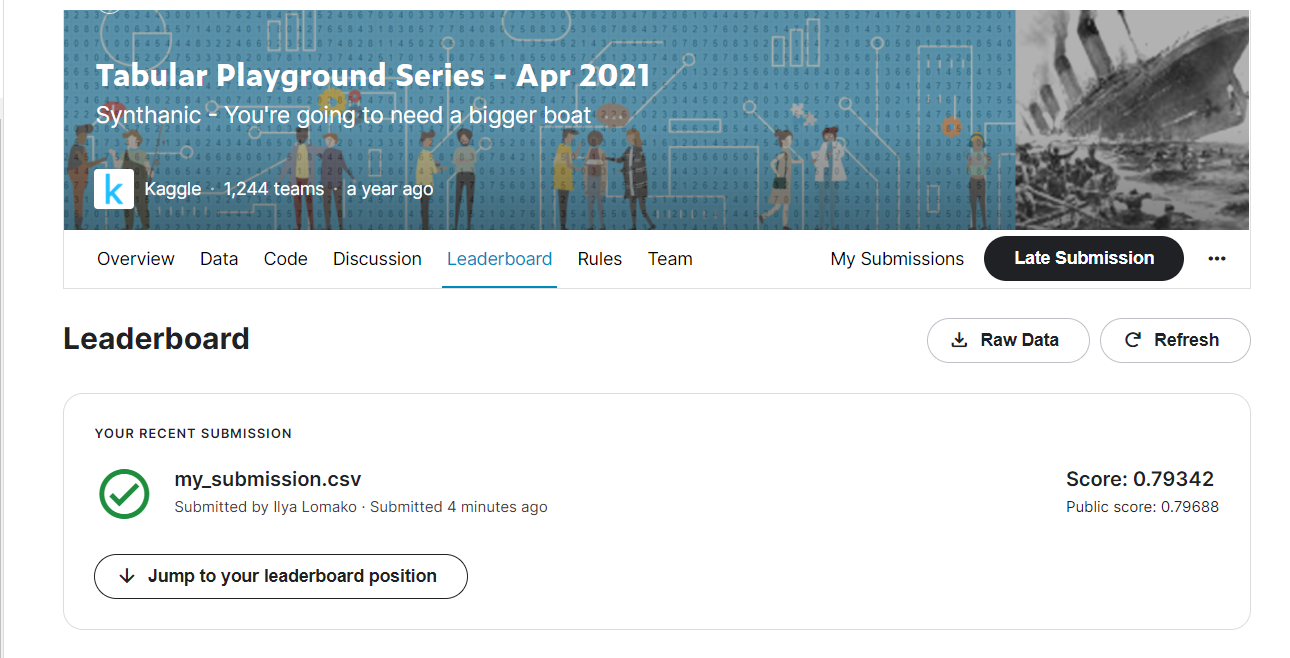

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [271]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

72.98


Select the best model, load the test set and make the predictions. Submit them to kaggle and see the results :)

**Note**. X points will depend on your kaggle public leaderboard score.
$$ f(score) = 1.0, \ \ 0.79 \leq score < 0.80,$$
$$ f(score) = 2.5, \ \ 0.80 \leq score < 0.81,$$ 
$$ f(score) = 4.0, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.